### Made by Liang Yihuai, 2019/12/02

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import sys
import time
from prof_dataset import ProfDataset

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [5]:
data_path_close_test = 'images/Test1/Test'
data_path_train = 'images/Test1/Training images'

## get training data

In [6]:
x_train, y_train = ProfDataset(data_path_train).well_preprocessed_data()
x_test, y_test = ProfDataset(data_path_close_test).well_preprocessed_data()

In [7]:
print(x_train.shape)
print(x_test.shape)

(25, 16384)
(40, 16384)


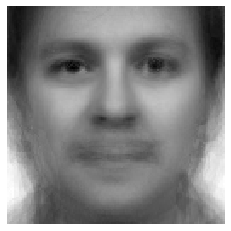

In [8]:
# get mean face
profData = ProfDataset(data_path_train)
before_mean_face = profData.get_data()[0]
meanFace = profData.mean_face(before_mean_face)
plt.imshow(meanFace.reshape(128, 128), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

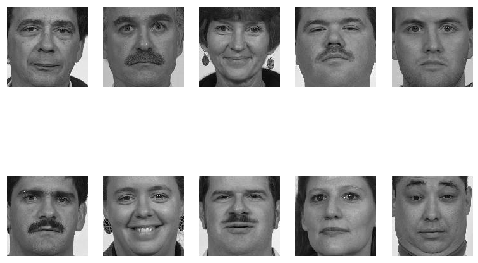

In [9]:
# display faces before minus mean faces.
for i in range(10):
    plt.subplot(2, 5, i+1) # row / col / index + 1
    plt.imshow(before_mean_face[i].reshape(128, 128), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

In [10]:
# whether 'dataset' contains 'a_data'
def contains(dataset, a_data):
    for v in dataset:
        if v == a_data:
            return True;
    return False

In [11]:
NOBODY = '0'

# the people in the test data but not in the training set are 'nobody'.
# mark people who is nobody for test data
for i in range(len(y_test)):
    if not contains(y_train, y_test[i]):
        y_test[i] = NOBODY


In [12]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == NOBODY:
        count += 1
print((count / len(y_test) * 100), '% people in the close test set are NOBODY')

35.0 % people in the close test set are NOBODY


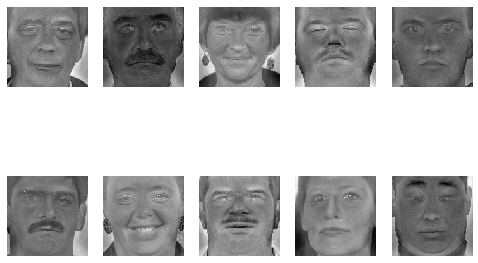

In [13]:
row_size = 128
col_size = 128

# train faces after minus mean face

for i in range(10):
    plt.subplot(2, 5, i+1) # row / col / index + 1
    plt.imshow(x_train[i].reshape(row_size, col_size), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

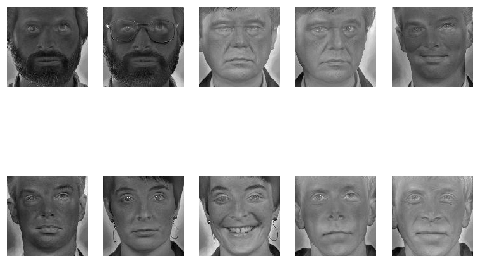

In [14]:
# test faces after minus mean face
for i in range(10):
    plt.subplot(2, 5, i+1) # row / col / index + 1
    plt.imshow(x_test[i].reshape((row_size, col_size)), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

In [15]:
U,S,V = np.linalg.svd(x_train)
print(U.shape, S.shape, V.shape)

(25, 25) (25,) (16384, 16384)


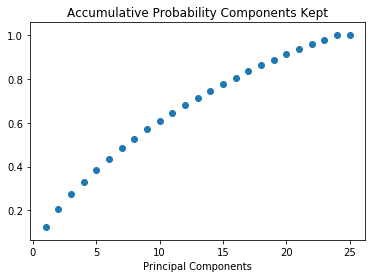

In [16]:
sum_eigenvalues = np.sum(S)
temp_sum = 0.0;
sum_arr = []
for i in range(len(S)):
    temp_sum += S[i]
    sum_arr.append(temp_sum/sum_eigenvalues);

plt.title('Accumulative Probability Components Kept')
plt.xlabel('Principal Components')
plt.scatter(range(1, len(sum_arr)+1), sum_arr)
plt.show()

In [17]:
component_n = 50
components = V
x_train_newspace = U[:, :component_n]

def tranform(X):
    new_components = components[: component_n]
    return np.dot(X, new_components.T)

def inverse_transform(X):
    if np.ndim(X) == 1:
        feature_num = np.shape(X)[0]
    else:
        feature_num = np.shape(X)[1]
    return np.dot(X, components[: feature_num])

In [19]:
x_test_newspace = tranform(x_test)

In [20]:
print(x_train_newspace.shape, x_test_newspace.shape)

(25, 25) (40, 50)


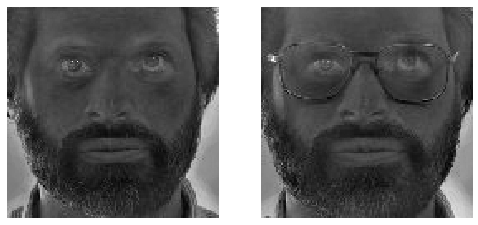

In [21]:
for i in range(2):
    plt.subplot(1, 2, i+1) 
    plt.imshow(np.reshape(x_test[i], (row_size, col_size)), cmap=plt.cm.gray)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.axis('off')
plt.show()

compenent num is:  25 , keep  99.99999999999999 % info.


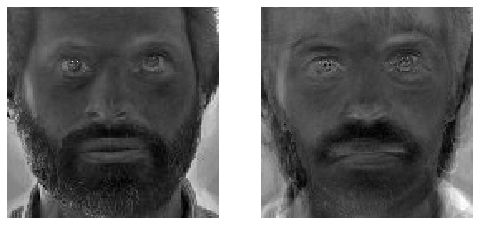

compenent num is:  20 , keep  91.3408921309757 % info.


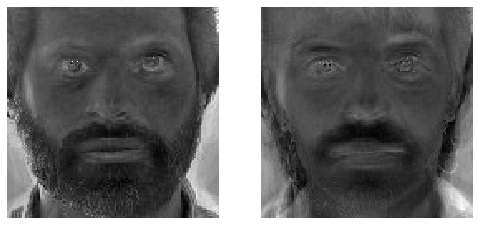

compenent num is:  15 , keep  77.52451681315449 % info.


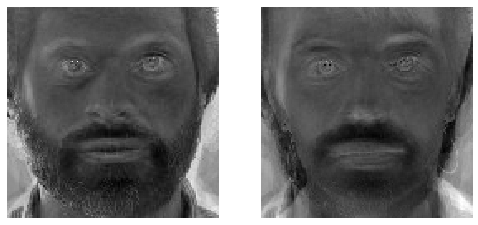

compenent num is:  12 , keep  67.93267957010754 % info.


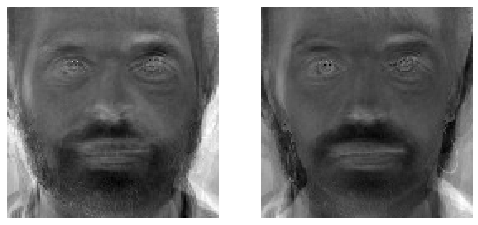

compenent num is:  10 , keep  60.96397384143189 % info.


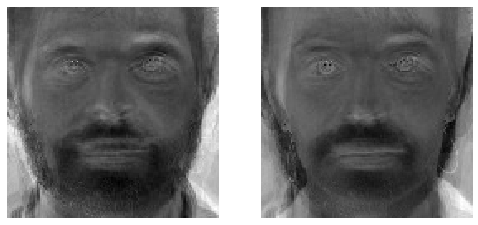

compenent num is:  8 , keep  52.80545454075272 % info.


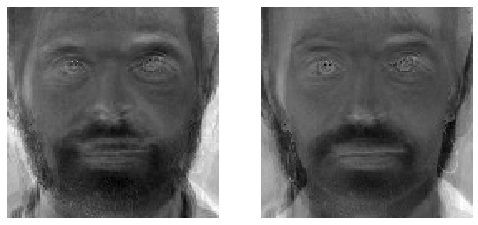

compenent num is:  6 , keep  43.48438848807693 % info.


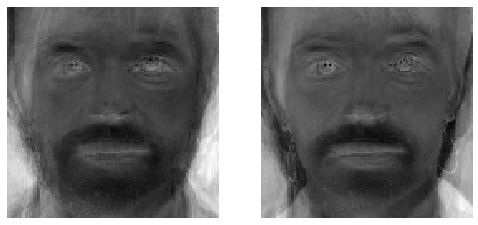

compenent num is:  4 , keep  33.20248746168337 % info.


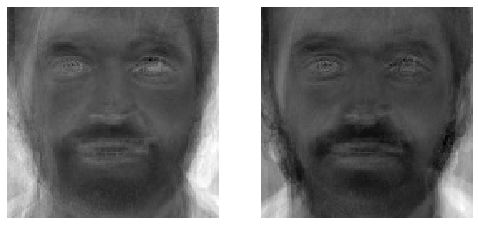

compenent num is:  3 , keep  27.415795465976338 % info.


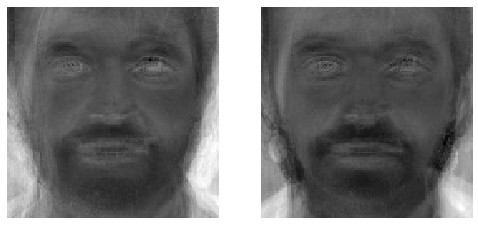

compenent num is:  2 , keep  20.829161557524472 % info.


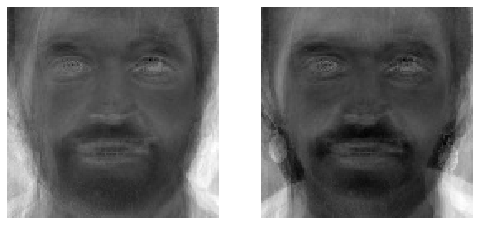

compenent num is:  1 , keep  12.484738271712684 % info.


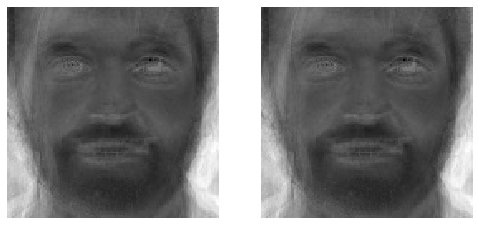

In [23]:
component_num_arr = [25, 20, 15, 12, 10, 8, 6, 4, 3, 2, 1]
for num in component_num_arr:
    component_n = num;
    x_transformed = tranform(x_test[:2])
    x_test_inversed = inverse_transform(x_transformed)
    
    sum_component = 0;
    for i in range(0, num):
        sum_component += S[i] 
    
    sum_all_component = np.sum(S)
    
    print("compenent num is: ", num, ", keep ",  (sum_component/sum_all_component) * 100 ,"% info.")
    for i in range(2):
        plt.subplot(1, 2, i+1) 
        plt.imshow(np.reshape(x_test_inversed[i], (row_size, col_size)), cmap=plt.cm.gray)
        plt.subplots_adjust(right=1.2, top=1.2)
        plt.axis('off')
    plt.show()


In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(whiten=True, n_components=10)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)


In [60]:
x_train_new.shape

(25, 10)

In [61]:
x_test_new.shape

(40, 10)

In [62]:
# norm L2 distance
def distance(arr1, arr2):
    sub = np.subtract(arr1, arr2)
    return np.sqrt(np.dot(sub, sub)) / len(arr1)

In [63]:

def predict(x_train_, x_test_, thres = sys.maxsize):
    result = []
    for i in range(len(x_test_)):
        min_dist = sys.maxsize
        prediction = -1;
        for k in range(len(x_train_)):
            dist = distance(x_test_[i], x_train_[k])
            if dist < min_dist:
                prediction = k
                min_dist = dist
        
        if min_dist > thres:
            result.append(NOBODY)
        else:
            result.append(y_train[prediction])
    return result

In [64]:
def get_max_correct_dist(x_train_, x_test_, y_test_):
    max_correct_dist = 0
    for i in range(len(x_test_)):
        min_dist = sys.maxsize
        prediction = -1;
        for k in range(len(x_train_)):
            dist = distance(x_test_[i], x_train_[k])
            if dist < min_dist:
                prediction = k
                min_dist = dist
        
        
        if y_train[prediction] == y_test_[i]:
            if dist > max_correct_dist:
                max_correct_dist = dist
    
    return max_correct_dist

In [65]:
def acc(preds, y_test_):
    return np.mean(preds==y_test_)

In [66]:
result = predict(x_train_new, x_test_new)
acc(result, y_test)

0.575

In [67]:
get_max_correct_dist(x_train_new, x_test_new, y_test)

0.512800889444988

In [68]:
ran_arr = np.random.rand(100)
best_thres = 0
max_acc = 0

thres_history = []
acc_history = []

for thres in np.sort(ran_arr):
    result = predict(x_train_new, x_test_new, thres)
    accuracy = acc(result, y_test)
    
    thres_history.append(thres)
    acc_history.append(accuracy)
    
    if accuracy > max_acc:
        max_acc = accuracy
        best_thres = thres
    
print(best_thres, max_acc)

0.1571543856634816 0.775


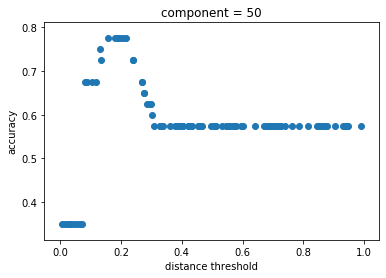

In [69]:
plt.title("component = 50")
plt.ylabel('accuracy')
plt.xlabel('distance threshold')
plt.scatter(thres_history, acc_history)
plt.show()

0.0021718248549531527 0.3


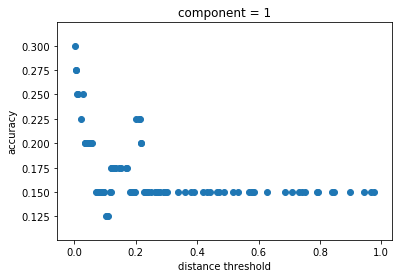

0.16477247060021172 0.375


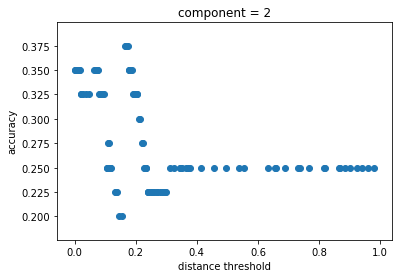

0.20951344515258805 0.625


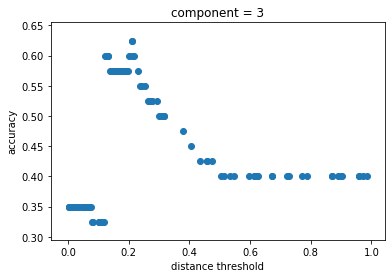

0.11786988626609252 0.7


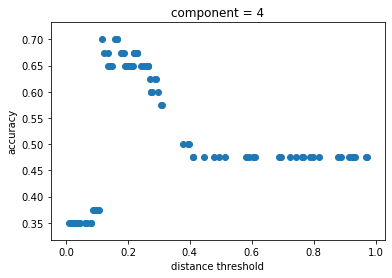

0.12041675512451791 0.7


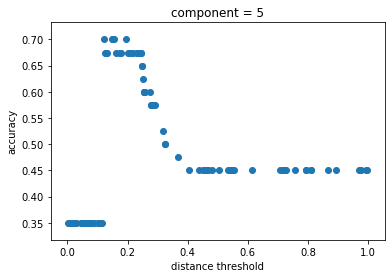

0.10430128126755782 0.7


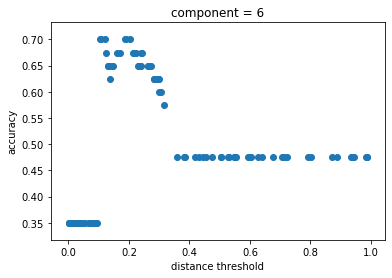

0.16285938816421774 0.725


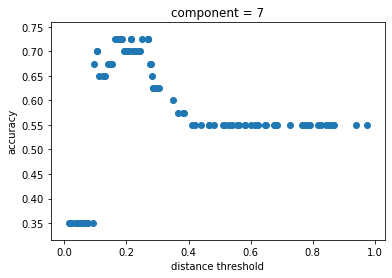

0.2332140973418153 0.75


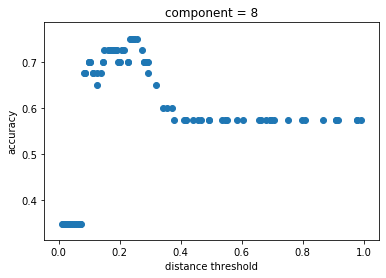

0.24353345588315936 0.825


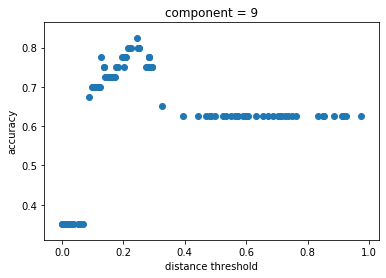

0.15764280125231286 0.775


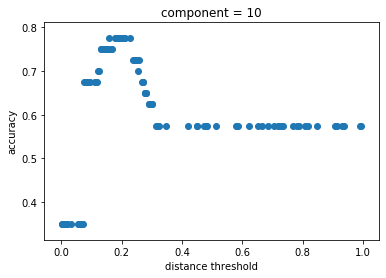

0.16970997734533988 0.8


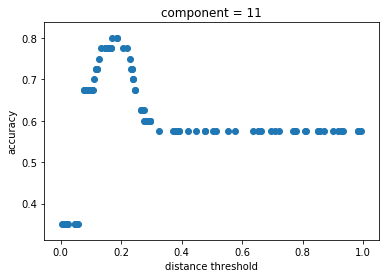

0.1592245202527771 0.775


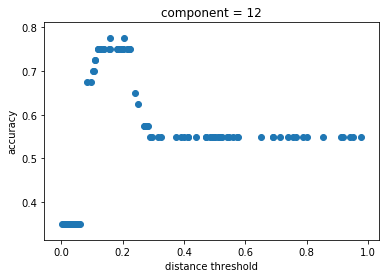

0.16054343152267747 0.775


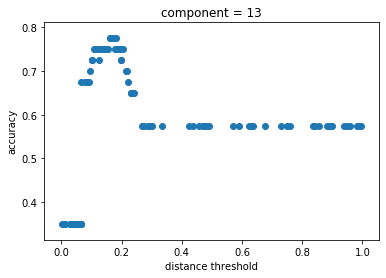

0.14302159984543875 0.75


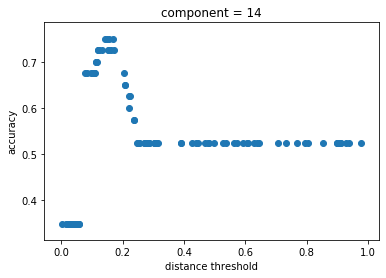

0.15697257172526274 0.775


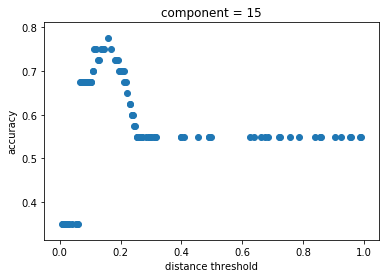

0.14690165576966882 0.8


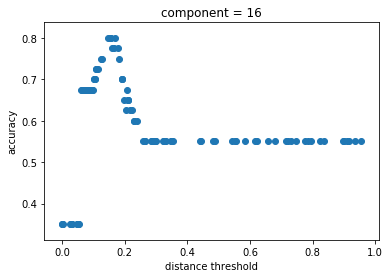

0.13238353894649046 0.775


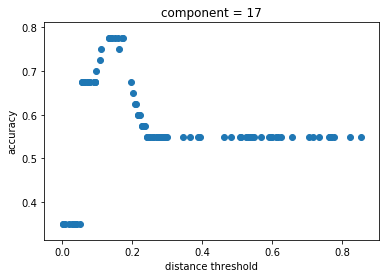

0.14842699351374597 0.825


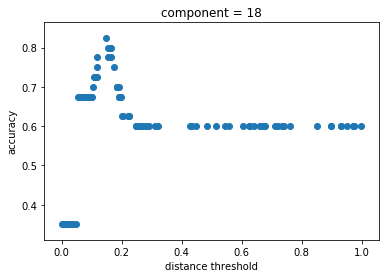

0.136264723291989 0.8


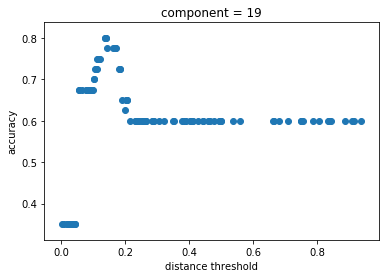

0.1471227192903682 0.85


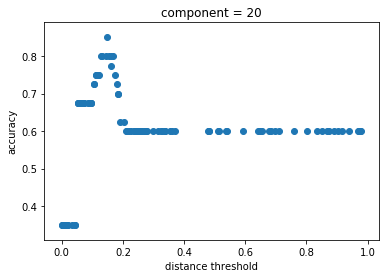

0.14329438424525906 0.825


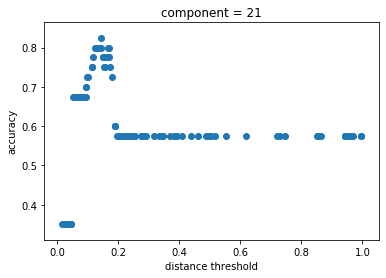

0.1416569539782595 0.825


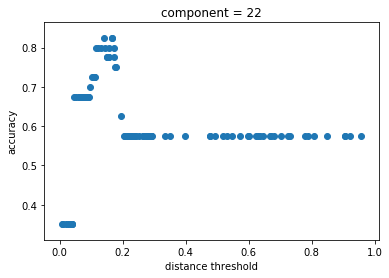

0.15848569805556453 0.85


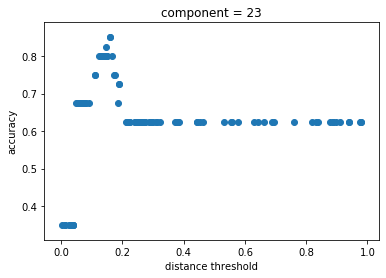

0.15474957730678657 0.9


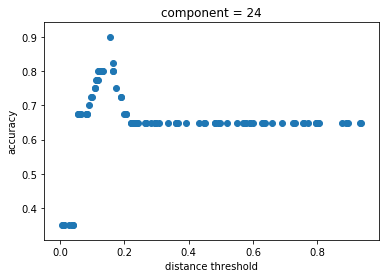

0.00129436352482043 0.35


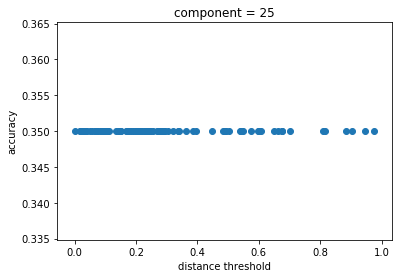

In [70]:
component_acc_tuple = []
for i in range(1, 26):
    pca = PCA(whiten=True, n_components=i)
    x_train_new = pca.fit_transform(x_train)
    x_test_new = pca.transform(x_test)

    ran_arr = np.append(np.random.rand(50), np.random.rand(50) * 0.3)
    
    best_thres = 0
    max_acc = 0

    thres_history = []
    acc_history = []

    for thres in np.sort(ran_arr):
        result = predict(x_train_new, x_test_new, thres)
        accuracy = acc(result, y_test)

        thres_history.append(thres)
        acc_history.append(accuracy)

        if accuracy > max_acc:
            max_acc = accuracy
            best_thres = thres

    print(best_thres, max_acc)
    component_acc_tuple.append((i, max_acc))
    
    plt.title("component = %d"%i)
    plt.ylabel('accuracy')
    plt.xlabel('distance threshold')
    plt.scatter(thres_history, acc_history)
    plt.show()

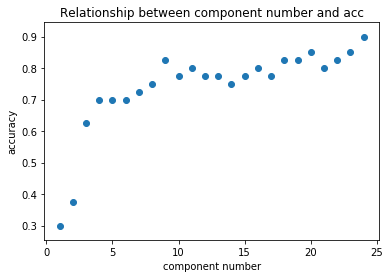

In [38]:
plt.title("Relationship between component number and acc")
plt.ylabel('accuracy')
plt.xlabel('component number')
plt.scatter([i for i, _ in component_acc_tuple], [acc for _, acc in component_acc_tuple])
plt.show()

In [39]:
best_acc = 0
index = 0
for i, acc in component_acc_tuple:
    if acc > best_acc:
        index = i
        best_acc = acc
print(index, best_acc)

24 0.9


### Conclusion 1
Currently, we get the best distance threshold = 0.15474. The best accuracy is 0.9.

In [40]:
import time

In [41]:
start = time.time()
result = predict(x_train_new, x_test_new, thres)
end = time.time()
print("prediction time of close test face, ", end-start)
print('prediction time per face is: ', (end - start)/ len(x_test_new))

prediction time of close test face,  0.015624284744262695
prediction time per face is:  0.0003906071186065674
